In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
import random

In [395]:
# Load in the data
df = pd.read_csv(r"../data/first_1000_JSON_files.csv", low_memory=True)

# Create a copy of the dataframe to work with
df_copy = df.copy()

# # change the value in the imei column to display  from scientific notation to standard notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\hb888\AppData\Local\Temp\ipykernel_9612\3537937307.py:2: DtypeWarning: Columns (51,59,62,63,67,69,72,73,86,88,90,91,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../data/first_1000_JSON_files.csv", low_memory=True)


In [396]:
# change imei column to a int64 data type
df_copy['imei'] = df_copy['imei'].astype('int64')

In [397]:
# only keep the rows where the value in the column 'imei' is 868500050064237
df_first_iot = df_copy[df_copy['imei'] == 868500050064237]

In [399]:
# create a dataframe with the columns 'imei' ,'dtd' and 'event.metric.btemp'
df_first_iot_btemp = df_first_iot[['imei', 'dtd', 'tracker.metric.bbatp','event.key']]

In [ ]:
df_first_iot_btemp

,imei,dtd,device.metric.dactualsp,event.key
423925,868500050064237,2023-11-23T06:05:12Z,NaN,rest_to_motion
423926,868500050064237,2023-11-23T06:05:48Z,NaN,motion_to_rest
423927,868500050064237,2023-11-23T16:52:13Z,0.000,NaN
423928,868500050064237,2023-11-23T16:52:16Z,NaN,main_battery_charging_start
423929,868500050064237,2023-11-23T16:52:13Z,NaN,NaN
...,...,...,...,...
453426,868500050064237,2023-11-30T03:50:43Z,NaN,device_off
453427,868500050064237,2023-11-30T03:50:50Z,NaN,main_battery_charging_stop
453428,868500050064237,2023-11-30T05:25:32Z,NaN,rest_to_motion
453429,868500050064237,2023-11-30T05:25:52Z,NaN,NaN


In [400]:
# show the value counts of the column 'device.metric.dactualsp'
df_first_iot_btemp['tracker.metric.bbatp'].value_counts()

100.000    16632
98.000        51
97.000         9
96.000         5
Name: tracker.metric.bbatp, dtype: int64

In [ ]:
# show the amount of rows where 'device.metric.btemp' is not null
df_first_iot_btemp['device.metric.dactualsp'].count()

# only keep these rows
df_first_iot_btemp = df_first_iot_btemp[df_first_iot_btemp['device.metric.dactualsp'].notnull()]

# change the data type of the column 'device.metric.btemp' to an int64
df_first_iot_btemp['device.metric.dactualsp'] = df_first_iot_btemp['device.metric.dactualsp'].astype('int64')

# change the data type of the column 'dtd' to a datetime
df_first_iot_btemp['dtd'] = pd.to_datetime(df_first_iot_btemp['dtd'])

C:\Users\hb888\AppData\Local\Temp\ipykernel_9612\2892845324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_iot_btemp['device.metric.dactualsp'] = df_first_iot_btemp['device.metric.dactualsp'].astype('int64')
C:\Users\hb888\AppData\Local\Temp\ipykernel_9612\2892845324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_iot_btemp['dtd'] = pd.to_datetime(df_first_iot_btemp['dtd'])


In [ ]:
df_first_iot_btemp.dtypes

imei                                     int64
dtd                        datetime64[ns, UTC]
device.metric.dactualsp                  int64
event.key                               object
dtype: object

In [ ]:
df_first_iot_btemp

,imei,dtd,device.metric.dactualsp,event.key
423927,868500050064237,2023-11-23 16:52:13+00:00,0,NaN
423934,868500050064237,2023-11-23 16:52:47+00:00,0,NaN
423940,868500050064237,2023-11-23 16:53:05+00:00,0,NaN
423948,868500050064237,2023-11-23 16:53:21+00:00,0,NaN
423957,868500050064237,2023-11-23 16:53:38+00:00,0,NaN
...,...,...,...,...
453420,868500050064237,2023-11-30 03:48:41+00:00,0,NaN
453421,868500050064237,2023-11-30 03:49:11+00:00,0,NaN
453422,868500050064237,2023-11-30 03:49:42+00:00,0,NaN
453423,868500050064237,2023-11-30 03:50:12+00:00,0,NaN


In [ ]:
df_first_iot_btemp['days'] = df_first_iot_btemp['dtd'] - df_first_iot_btemp['dtd'].min()
df_first_iot_btemp['hours'] = df_first_iot_btemp['days'].dt.total_seconds() / 3600

C:\Users\hb888\AppData\Local\Temp\ipykernel_9612\3679798302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_iot_btemp['days'] = df_first_iot_btemp['dtd'] - df_first_iot_btemp['dtd'].min()
C:\Users\hb888\AppData\Local\Temp\ipykernel_9612\3679798302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_iot_btemp['hours'] = df_first_iot_btemp['days'].dt.total_seconds() / 3600


In [ ]:
# if the date in the 'dtd' column occurs more than once, only keep the first occurence
df_first_iot_btemp = df_first_iot_btemp.drop_duplicates(subset='dtd', keep='first')

In [ ]:
# only keep the wors where device.metric.dactualsp is greater than 0
df_first_iot_btemp = df_first_iot_btemp[df_first_iot_btemp['device.metric.dactualsp'] > 0]

In [ ]:
# only show some rows where event.key is not nan
# df_first_iot_btemp = df_first_iot_btemp[df_first_iot_btemp['event.key'].notnull()]

# # show unique values in the device.metric.bsocp column
# df_first_iot_btemp['device.metric.dactualsp'].value_counts()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


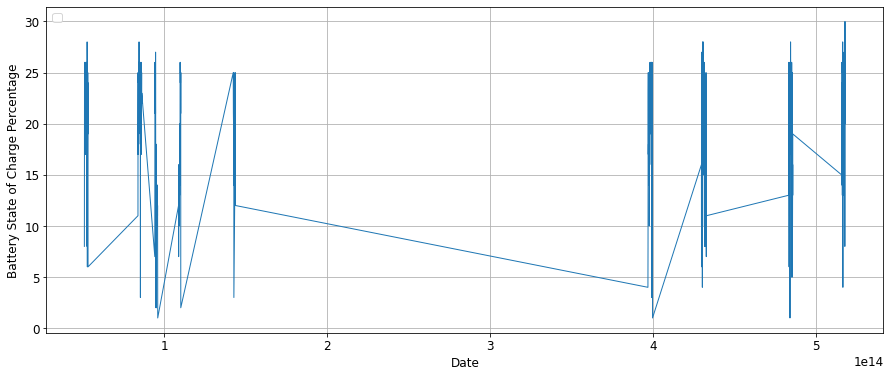

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(df_first_iot_btemp['days'], df_first_iot_btemp['device.metric.dactualsp'], linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Battery State of Charge Percentage')
ax.grid(True)
ax.legend(loc='upper left');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


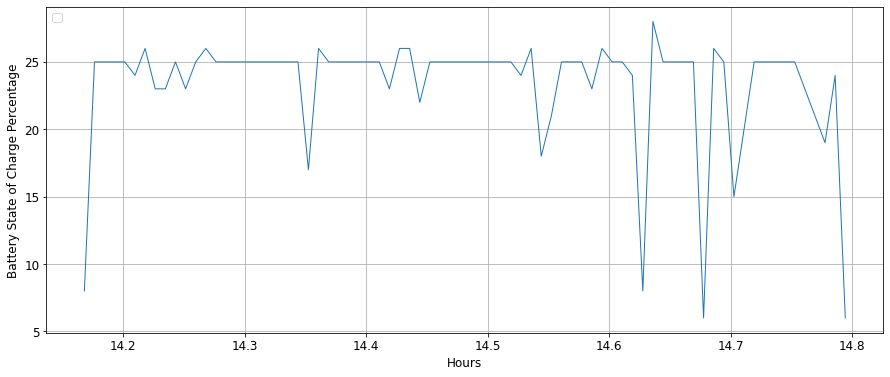

In [ ]:
# # create a plot for the first 96 hours
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(df_first_iot_btemp['hours'][:73], df_first_iot_btemp['device.metric.dactualsp'][:73], linewidth=1)

ax.set_xlabel('Hours')
ax.set_ylabel('Battery State of Charge Percentage')
ax.grid(True)
ax.legend(loc='upper left');

In [ ]:
lowess = sm.nonparametric.lowess(df_first_iot_btemp['device.metric.dactualsp'], df_first_iot_btemp['days'], frac=0.1)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


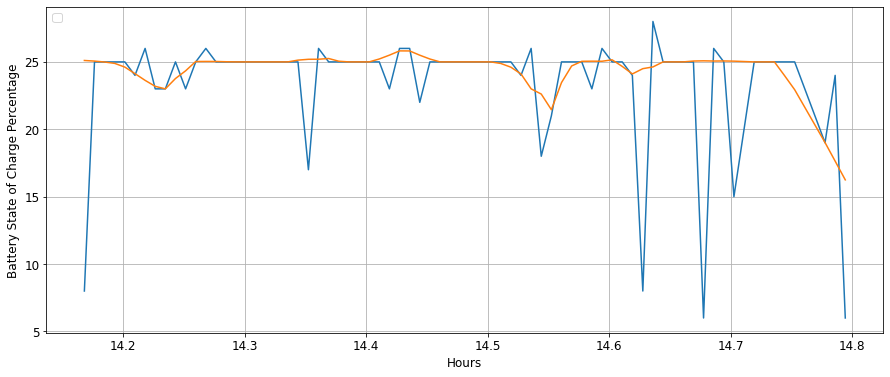

In [ ]:
# this but with the first 96 hours
lowess = sm.nonparametric.lowess(df_first_iot_btemp['device.metric.dactualsp'][:73], df_first_iot_btemp['hours'][:73], frac=0.1)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(df_first_iot_btemp['hours'][:73], df_first_iot_btemp['device.metric.dactualsp'][:73])
plt.plot(lowess_x, lowess_y)

ax.set_xlabel('Hours')
ax.set_ylabel('Battery State of Charge Percentage')
ax.grid(True)
ax.legend(loc='upper left');

In [ ]:
# decompose the time series
stl = STL(df_first_iot_btemp['device.metric.dactualsp'].to_numpy(), period= 96)
res = stl.fit()

In [ ]:
seasonal, trend, resid = res.seasonal, res.trend, res.resid

cleaned_data = seasonal + trend

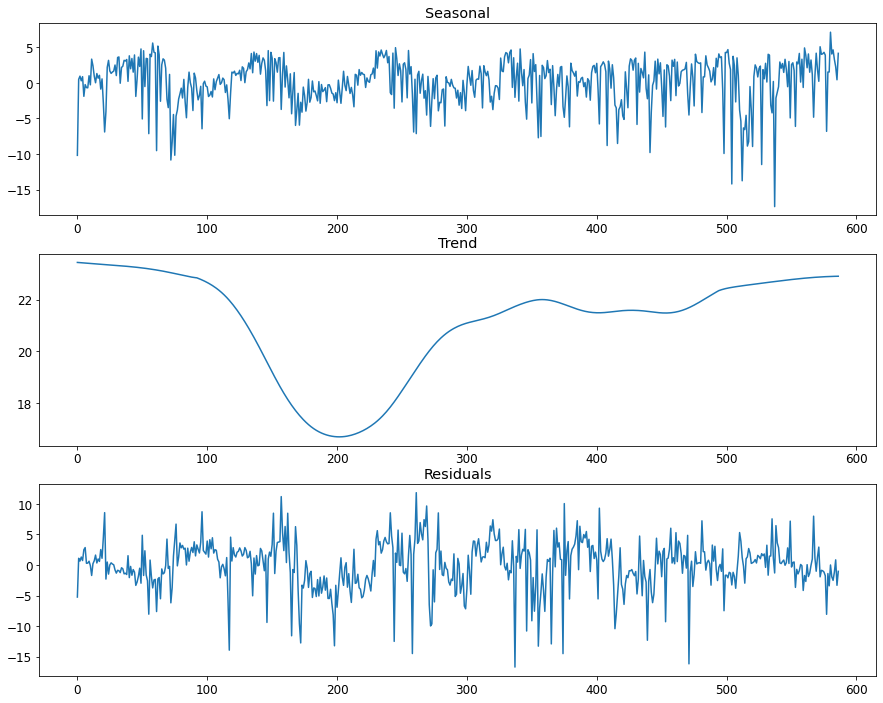

In [ ]:
plt.figure(figsize = (15, 12))

plt.subplot(3,1,1)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(3,1,2)
plt.plot(trend)
plt.title('Trend')

plt.subplot(3,1,3)
plt.plot(resid)
plt.title('Residuals')

plt.show()

In [ ]:
res_mean = resid.mean()
resid_std = resid.std()

lower_bound = res_mean - 2*resid_std
upper_bound = res_mean + 2*resid_std

Text(0, 0.5, 'speed')

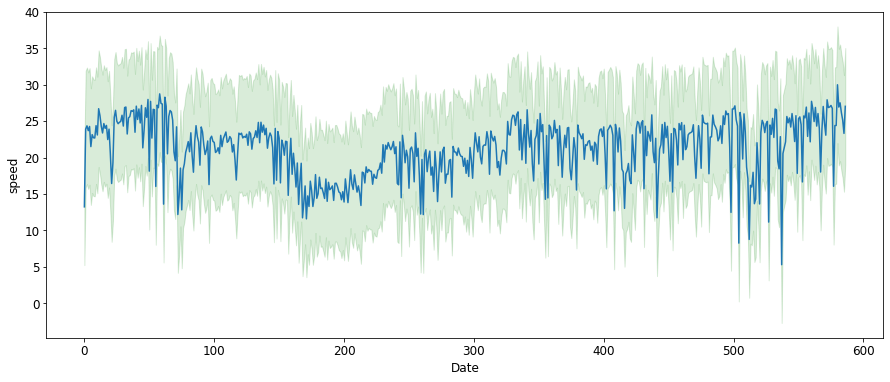

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(cleaned_data)
plt.fill_between(list(range(587)), cleaned_data - lower_bound, cleaned_data + lower_bound, color = 'g', alpha = 0.15)

ax.set_xlabel('Date')
ax.set_ylabel('speed')

# plt.ylim(bottom=0)

In [ ]:
anomalies = df_first_iot_btemp[(resid < lower_bound) | (resid > upper_bound)]

In [ ]:
# anomalies[['date', 'meantemp']].rename(columns={'meantemp': 'anomaly_value'}).join(
#     meantemp_data[(resid < lower_bound) | (resid > upper_bound)][['date', 'meantemp']].set_index('date'),
#     on = 'date'
# )


# make the above code work for my code
anomalies[['dtd', 'device.metric.dactualsp']].rename(columns={'device.metric.dactualsp': 'anomaly_value'}).join(
    df_first_iot_btemp[(resid < lower_bound) | (resid > upper_bound)][['dtd', 'device.metric.dactualsp']].set_index('dtd'),
    on = 'dtd'
)

,dtd,anomaly_value,device.metric.dactualsp
428046,2023-11-24 07:12:51+00:00,25,25
428154,2023-11-24 07:29:53+00:00,8,8
428401,2023-11-24 16:25:05+00:00,25,25
428477,2023-11-24 16:35:35+00:00,3,3
428633,2023-11-24 19:02:47+00:00,7,7
428661,2023-11-24 19:05:17+00:00,25,25
428681,2023-11-24 19:08:19+00:00,26,26
428697,2023-11-24 19:10:49+00:00,27,27
428716,2023-11-24 19:14:42+00:00,2,2
428743,2023-11-24 19:18:42+00:00,2,2
